# Strategy
- Clean and reformating the data for the ease of analysis. 
- Analyzing questions seperatety and relate various components together in order to obtain a valuable conclusion.

In [5]:
# Importing the needed libraries
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

# Loading the reponse Data
# res = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv', low_memory=False)
res = pd.read_csv('./kaggle_survey_2020_responses.csv', low_memory=False)

# Loading and Cleaning the data
- Column names are verbose and they do not help. Column names have been changed by replacing '_Part_' and '_' with '.', 'OTHER' with '0'.
- Most columns are actually options for a question. It would help the analysis to break down the dataframe into subset of questions. This would mean that for each question we will have n columns representing n possible answers (to that question) in the binary format.
- The majority of missing values are because of the multi optional questions but they are some uni-option question with missing values that need imputing. Yet we have to go through each question to find the feasible value to fill the missing values with.

In [29]:
# Formating the columns for comfortable access
column_dict = {}

# Getting the dictionary needed to change the column names
for col in res.columns:
    n_col = col.replace('_Part_', '.')
    n_col = n_col.replace('_', '.')
    n_col = n_col.replace('OTHER', '0')
    column_dict[col] = n_col
    
# Rename the columns
res.rename(columns=column_dict, inplace=True)

# Getting the uni-option columns/questions
uo_cols = []
for col in res.columns[1:]:
    if not '.' in col:
        uo_cols.append(col)
        
res.drop([0], inplace=True)

# Break Down
Functions below are used to format the data into a more readable format.

In [7]:
def break_down(start_index: int, end_index: int):
    """
        Subsetting the dataframe into questions and binarizing the columns
        
        input: 
            start_index: The start of the subset index
            end_index: The end of the subset index
            
        return:
            dataframe containing the reponses to a given question
    """
    subset = res.iloc[1:, start_index:end_index].copy()
    
    return binary_formatting(subset)

def binary_formatting(df: pd.DataFrame):
    """
        Binarizing the columns, changing the column names
        
        input:
            df: Dataframe to binarize
        
        return:
            A dataframe of binary columns with answers as their column names
    """
    col_dict = {}
    for col in df.columns:
        val = np.nan
        if pd.isna(df[col].unique()[0]):
            val = df[col].unique()[1]
        else:
            val = df[col].unique()[0]
        
        
        if val == np.nan:
            df[col] = df[col].map({np.nan: 0})
        else:
            df[col] = df[col].map({val: 1, np.nan: 0})
        
        col_dict[col] = val

    df.rename(columns=col_dict, inplace=True)
    
    return df

In [6]:
uo_cols # Uni-option columns

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q8',
 'Q11',
 'Q13',
 'Q15',
 'Q20',
 'Q21',
 'Q22',
 'Q24',
 'Q25',
 'Q30',
 'Q32',
 'Q38']

` Break down of uni-option questions`
- Q1: Age 
- Q2: Geneder 
- Q3: Country 
- Q4: Education
- Q5: Role
- Q6: Programming years
- Q8: Recommended Programming Language for a beginner
- Q11: Most Common setup
- Q13: # of TPU uses
- Q15: # of years using ML algorithms
- Q20: # of employees in ur company
- Q21: # of DS people in ur company
- Q22: Does your workplace use ML?
- Q24: Salary
- Q25: ML expenses
- Q30: Most frequent used Big Data tool
- Q32: Most frequent used BI tool
- Q38: Primary tool for analyzing data

In [9]:
# Mulit-Option Question Break downs
language = break_down(7, 20) # Q7
ide = break_down(21, 33) # Q9
host_prod = break_down(33, 47) # Q10
spec_hardware = break_down(48, 52) # Q12: TPU, GPU
viz_lib = break_down(53, 65) # Q14: Which data visualization lib do u use?
ml_lib =  break_down(66, 82) # Q16: Regularly used ML libraries
algo = break_down(83, 94) # Q17: Regularly used ML Algorithms
comp_vision = break_down(94, 101) # Q18: Algorithms related to Computer Vision
nlp = break_down(101, 107) # Q19: Algorithms related to NLP
work_activity = break_down(110, 118) # Q23
cloud_platform = break_down(120, 132) # 26.a

# Brain Storming
I don't believe anyone knows if they are going to find something significant when they go through a dataset. I hypothesize that analysis techniques aside, Brain Storming on the data could help the creeative process. And by brainstorming, I mean going through data and trying to challenge your thoughts on the matter.

# Q1: Age
- Majority of Kagglers are between 25-29 age range
- It is safe to say that the majority of the Kagglers are between 18-29 years old. The ranges above 30 are in order (30-34 followed by 35-39 and etc.)
- Interestingly they are some 70+ participatin in Kaggle.

<AxesSubplot:>

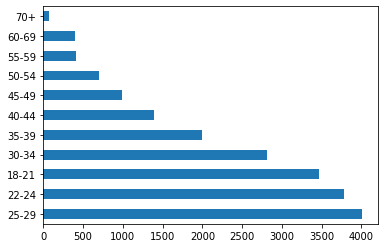

In [6]:
# Graphing the occurances
res.loc[:,'Q1'].value_counts().plot.barh()

# Q2: Gender
- There is an obvious gender gap within the Kaggle community.
- The are 4 times (almost) more men than women in the industry.

<AxesSubplot:>

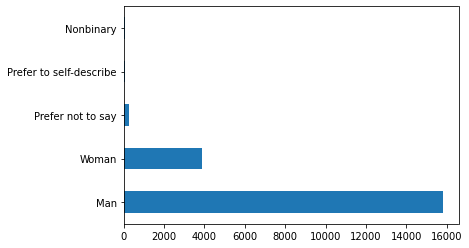

In [13]:
# Graphing the occurances
res.loc[:,'Q2'].value_counts()[:].plot.barh()

# Q3: Country
- Kagglers are from 55 different countries (Counting the others).
- In the first 10 countries with the most Kagglers, India is at the lead. Which is interesting since India and Nigeria are the only two non-first world countries in top 10. In future, we might change our definition of first and second world.
- Based on China's economy and tech initiatives, one might expect to see China in top five. Yet, interestingly China is below US and India with a large difference.
- Looking at the data, we can see that people from all over the world are participating

## Relation between infrastructure and Kaggling:
It is logical to expect the `First-word` countries have a higher participation rate with in the Kaggle community. It is less likely for people in Syria (where a civil war is going on) to have the time to use Kaggle. I suspect there is also more value to doing Kaggle competitions in First-wolrd countries since the employers will acknowledge your talent given your participation level on Kaggle.
- India has the most Kagglers. There several factors to consider:
    - India has the 2nd largest population: Because of its large population, even if a smaller proportion of the society were involved on Kaggle still it would could still be at first rank.
    - India is a development country (2nd world): This shows that given India is not a first-world country, it has the needed infrastructure (internet connection, educational resouces, and etc.) for individuals to participate on Kaggle. Same thing is true about Nigeria.
- Nigeria: It is one of the two development countries in top 10. Which implies that Nigerians have the infrastructure and are motivated enough to participate on kaggle.
- As we go down the list, we see less `First-World` countries and more development countries. We even come across some `Third-World` coutnries (Iran).

In [9]:
# Number of difffernet countries
print('# of different countries: ', res.loc[:,'Q3'].unique().shape[0] - 1)
res[res['Q3'] == 'United Kingdom of Great Britain and Northern Ireland']

# Shortening some of the names
country_dict = {
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'United States of America': 'US',
    'Republic of Korea': 'Korea',
    'United Arab Emirates': 'UAE',
    'South Korea': 'Korea',
    'Republic of Korea': 'Korea',
    'Iran, Islamic Republic of...': 'Iran'
}
res['Q3'] = res['Q3'].replace(country_dict)

# of different countries:  54


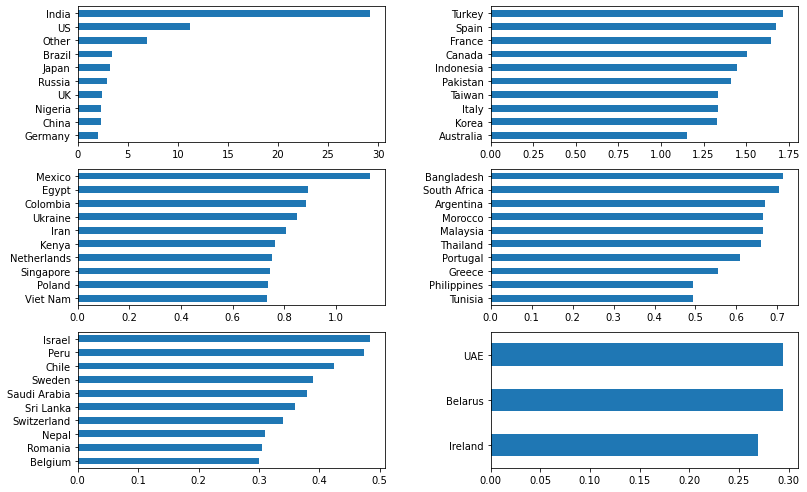

In [136]:
fig, (r1, r2, r3) = plt.subplots(3, 2, figsize=(5,7))
fig.tight_layout()

# Percentages of each countries involvement in Kaggle
percentages = res.loc[:,'Q3'].value_counts(normalize=True) * 100

# Row 1:
percentages[:10].sort_values().plot.barh(ax=r1[0])
percentages[10:20].sort_values().plot.barh(ax=r1[1])
# Row 2:
percentages[20:30].sort_values().plot.barh(ax=r2[0])
percentages[30:40].sort_values().plot.barh(ax=r2[1])
# Row 3:
percentages[40:50].sort_values().plot.barh(ax=r3[0])
percentages[50:-1].sort_values().plot.barh(ax=r3[1])

plt.subplots_adjust(left=0, bottom=None, right=2, top=None, wspace=None, hspace=0.2)

# Q4: Education
- The Majority of Kagglers have a Master's Degree and Bachelor. This kind of makes sense based on the age data. ages 18-25 are the range for these students.
`PLot the inner connections between age and degree`

<AxesSubplot:>

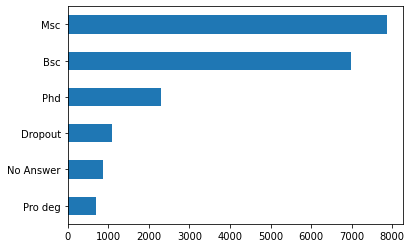

In [10]:
# Renaming the Values
res.loc[:, 'Q4'].replace(inplace=True, to_replace={
    'Doctoral degree': 'Phd',
    'Master’s degree': 'Msc',
    'Bachelor’s degree': 'Bsc',
    'No formal education past high school': 'High School',
    'Some college/university study without earning a bachelor’s degree': 'Dropout',
    'I prefer not to answer': 'No Answer',
    'Professional degree': 'Pro deg',
    np.nan: 'No Answer' # Imputing the missing values
})

# Plotting the occurances
res.loc[:, 'Q4'].value_counts()[:-1]. sort_values().plot.barh()

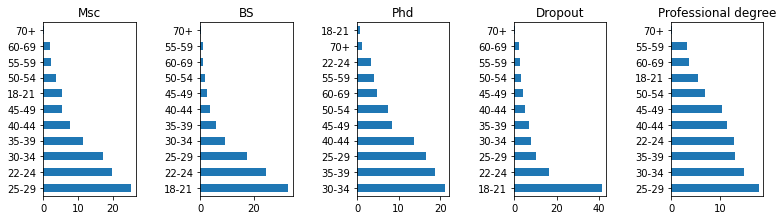

In [143]:
fig, (c1, c2, c3, c4, c5) = plt.subplots(1, 5, figsize=(5,3))
fig.tight_layout()

(res[res['Q4'] == 'Msc']['Q1'].value_counts(normalize=True) * 100).plot.barh(title='Msc', ax=c1)
(res[res['Q4'] == 'Bsc']['Q1'].value_counts(normalize=True) * 100).plot.barh(title='BS', ax=c2)
(res[res['Q4'] == 'Phd']['Q1'].value_counts(normalize=True) * 100).plot.barh(title='Phd', ax=c3)
(res[res['Q4'] == 'Dropout']['Q1'].value_counts(normalize=True) * 100).plot.barh(title='Dropout', ax=c4)
(res[res['Q4'] == 'Pro deg']['Q1'].value_counts(normalize=True) * 100).plot.barh(title='Professional degree', ax=c5)

plt.subplots_adjust(left=0, bottom=None, right=2, top=None, wspace=0.7, hspace=0.2)

- Majority of Msc students are in 25-29 age range, and most Bs students are in 18-21 age range.

`It would have been helpful to know the percentage of students who have a university or colledge degree alongside their professional degree ( which they might have aquired from a different kind of academic institution)`

# Q5: Role
some pre-analysis questions:
- Does degree affect role?
- What role does age play in one's role?

1. Students have the majority:
    - More than 50% percent of the student are working towards their Bs (or have a Bs).
    - 2nd largest % goes to Msc (which is kind of predictable).
    - Yet the third largest portion are dropouts.
2. Data Scientist:

<AxesSubplot:title={'center':'% of roles'}>

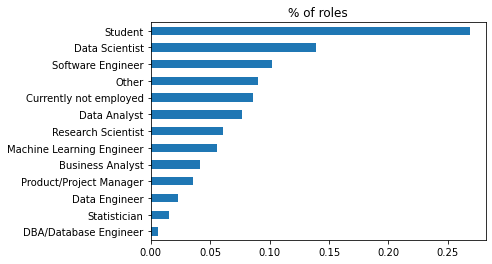

In [9]:
res['Q5'].value_counts(normalize=True).sort_values().plot.barh(title='% of roles')

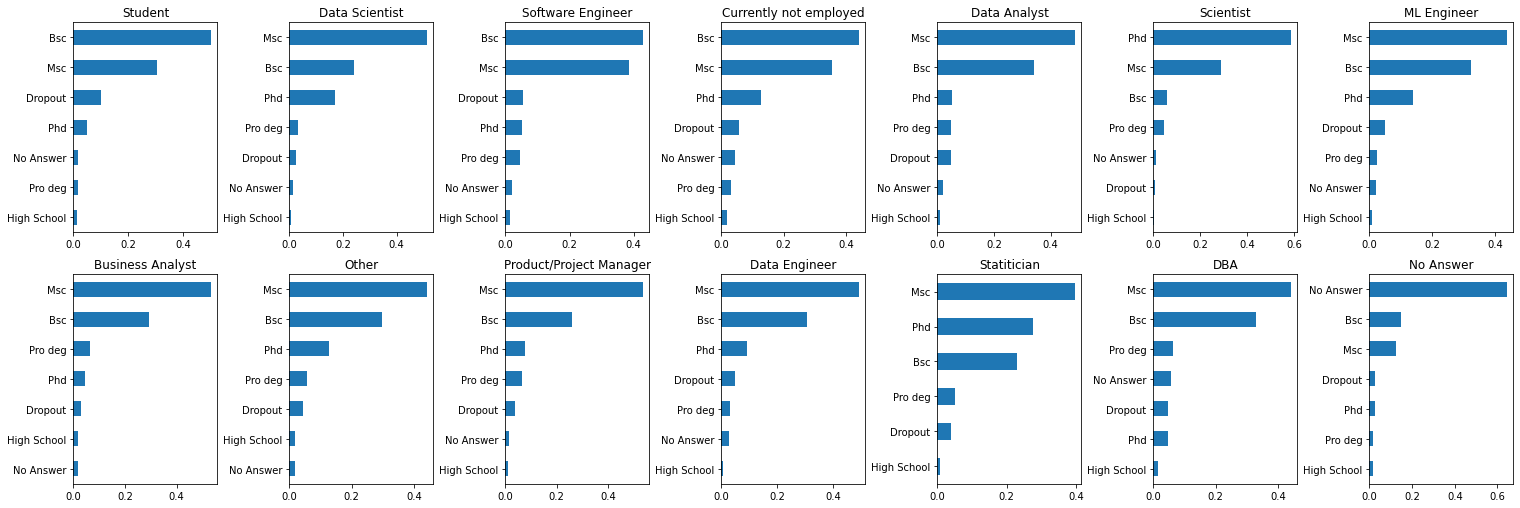

In [14]:
fig, (r1, r2) = plt.subplots(2, 7, figsize=(10,7))
fig.tight_layout()

# Row 1:
res[res['Q5'] == 'Student']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="Student",ax = r1[0])
res[res['Q5'] == 'Data Scientist']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="Data Scientist", ax=r1[1])
res[res['Q5'] == 'Software Engineer']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="Software Engineer", ax=r1[2])
res[res['Q5'] == 'Other']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="Other", ax=r1[3])
res[res['Q5'] == 'Currently not employed']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="Currently not employed", ax=r1[3])
res[res['Q5'] == 'Data Analyst']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="Data Analyst", ax=r1[4])
res[res['Q5'] == 'Research Scientist']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="Scientist",ax = r1[5])
res[res['Q5'] == 'Machine Learning Engineer']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="ML Engineer", ax=r1[6])
# Row 2:
res[res['Q5'] == 'Business Analyst']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="Business Analyst", ax=r2[0])
res[res['Q5'] == 'Other']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="Other", ax=r2[1])
res[res['Q5'] == 'Product/Project Manager']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="Product/Project Manager", ax=r2[2])
res[res['Q5'] == 'Data Engineer']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="Data Engineer", ax=r2[3])
res[res['Q5'] == 'Statistician']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="Statitician", ax=r2[4])
res[res['Q5'] == 'DBA/Database Engineer']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="DBA", ax=r2[5])
res[pd.isna(res['Q5'])]['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="No Answer", ax=r2[6])

plt.subplots_adjust(left=0, bottom=None, right=2, top=None, wspace=0.5, hspace=0.2)

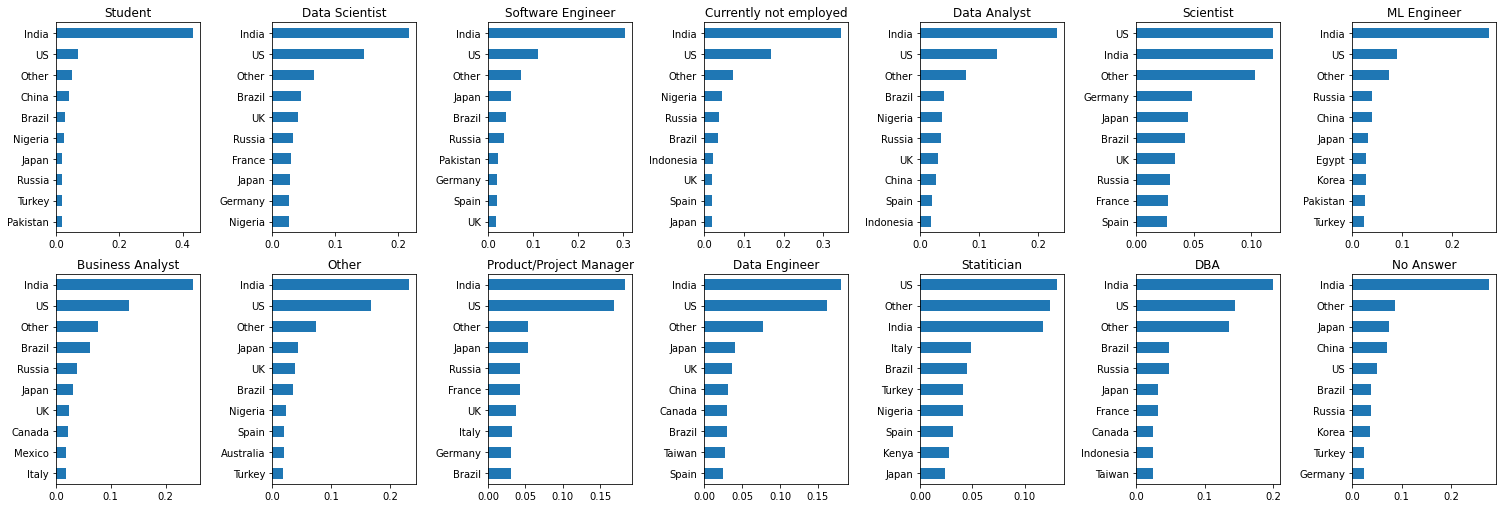

In [57]:
fig, (r1, r2) = plt.subplots(2, 7, figsize=(10,7))
fig.tight_layout()

# Row 1:
res[res['Q5'] == 'Student']['Q3'].value_counts(normalize=True)[:10].sort_values().plot.barh(title="Student",ax = r1[0])
res[res['Q5'] == 'Data Scientist']['Q3'].value_counts(normalize=True)[:10].sort_values().plot.barh(title="Data Scientist", ax=r1[1])
res[res['Q5'] == 'Software Engineer']['Q3'].value_counts(normalize=True)[:10].sort_values().plot.barh(title="Software Engineer", ax=r1[2])
res[res['Q5'] == 'Other']['Q3'].value_counts(normalize=True)[:10].sort_values().plot.barh(title="Other", ax=r1[3])
res[res['Q5'] == 'Currently not employed']['Q3'].value_counts(normalize=True)[:10].sort_values().plot.barh(title="Currently not employed", ax=r1[3])
res[res['Q5'] == 'Data Analyst']['Q3'].value_counts(normalize=True)[:10].sort_values().plot.barh(title="Data Analyst", ax=r1[4])
res[res['Q5'] == 'Research Scientist']['Q3'].value_counts(normalize=True)[:10].sort_values().plot.barh(title="Scientist",ax = r1[5])
res[res['Q5'] == 'Machine Learning Engineer']['Q3'].value_counts(normalize=True)[:10].sort_values().plot.barh(title="ML Engineer", ax=r1[6])
# Row 2:
res[res['Q5'] == 'Business Analyst']['Q3'].value_counts(normalize=True)[:10].sort_values().plot.barh(title="Business Analyst", ax=r2[0])
res[res['Q5'] == 'Other']['Q3'].value_counts(normalize=True)[:10].sort_values().plot.barh(title="Other", ax=r2[1])
res[res['Q5'] == 'Product/Project Manager']['Q3'].value_counts(normalize=True)[:10].sort_values().plot.barh(title="Product/Project Manager", ax=r2[2])
res[res['Q5'] == 'Data Engineer']['Q3'].value_counts(normalize=True)[:10].sort_values().plot.barh(title="Data Engineer", ax=r2[3])
res[res['Q5'] == 'Statistician']['Q3'].value_counts(normalize=True)[:10].sort_values().plot.barh(title="Statitician", ax=r2[4])
res[res['Q5'] == 'DBA/Database Engineer']['Q3'].value_counts(normalize=True)[:10].sort_values().plot.barh(title="DBA", ax=r2[5])
res[pd.isna(res['Q5'])]['Q3'].value_counts(normalize=True)[:10].sort_values().plot.barh(title="No Answer", ax=r2[6])

plt.subplots_adjust(left=0, bottom=None, right=2, top=None, wspace=0.5, hspace=0.2)

# Q6: Programming years
- Role vs Programming years
- Role vs Degree

In [11]:
res['Q6'].replace(inplace=True,
    to_replace = {
        '5-10 years': '5-10',
        '10-20 years': '10-20',
        '3-5 years': '3-5',
        '< 1 years': '< 1',
        '1-2 years': '1-2',
        '20+ years': '20+',
    }
                 )
res['Q6'].unique()

array(['5-10', '10-20', '3-5', '< 1', '1-2', '20+',
       'I have never written code', nan], dtype=object)

<AxesSubplot:>

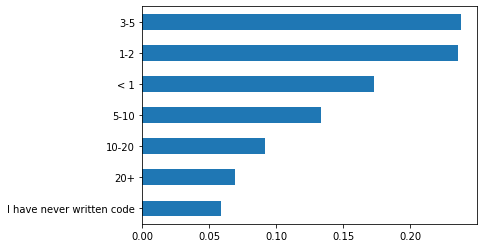

In [16]:
res['Q6'].value_counts(normalize=True).sort_values().plot.barh()

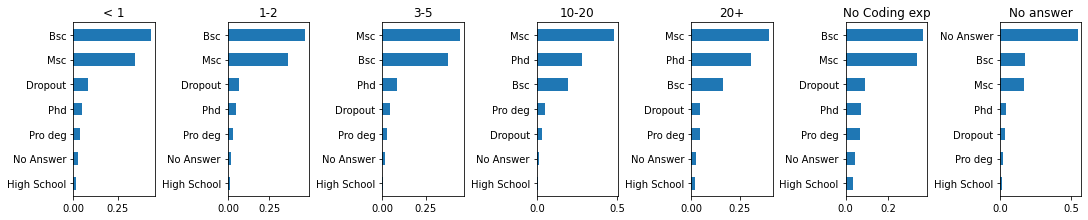

In [17]:
fig, r1 = plt.subplots(1, 7, figsize=(7,3))
fig.tight_layout()

# Row 1:
res[res['Q6'] == '< 1']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="< 1",ax = r1[0])
res[res['Q6'] == '1-2']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="1-2", ax=r1[1])
res[res['Q6'] == '3-5']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="3-5", ax=r1[2])
res[res['Q6'] == '5-10']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="5-10", ax=r1[3])
res[res['Q6'] == '10-20']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="10-20", ax=r1[3])
res[res['Q6'] == '20+']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="20+", ax=r1[4])
res[res['Q6'] == 'I have never written code']['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="No Coding exp",ax = r1[5])
res[pd.isna(res['Q6'])]['Q4'].value_counts(normalize=True).sort_values().plot.barh(title="No answer", ax=r1[6])

plt.subplots_adjust(left=0, bottom=None, right=2, top=None, wspace=0.9, hspace=0.2)

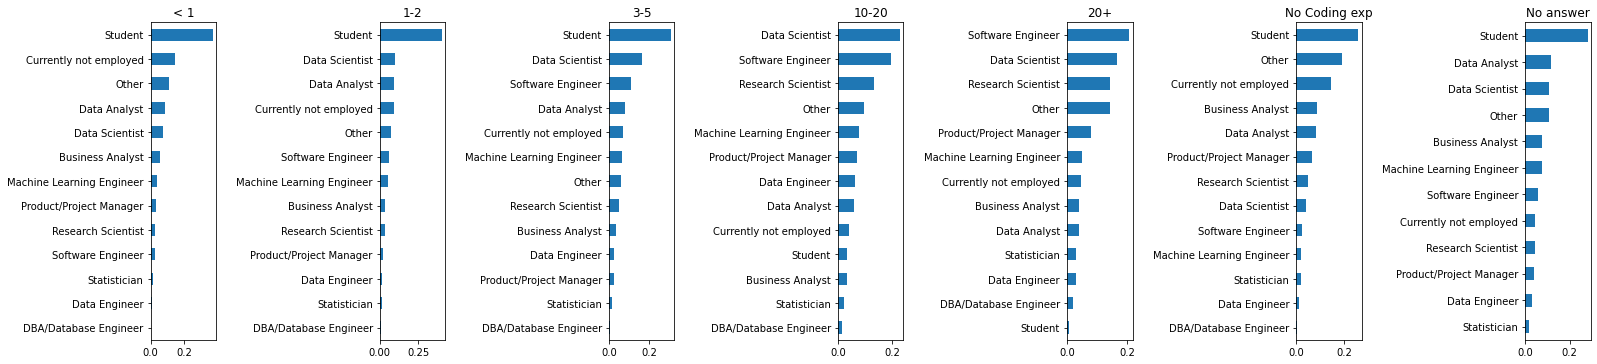

In [18]:
fig, r1 = plt.subplots(1, 7, figsize=(10,5))
fig.tight_layout()

# Row 1:
res[res['Q6'] == '< 1']['Q5'].value_counts(normalize=True).sort_values().plot.barh(title="< 1",ax = r1[0])
res[res['Q6'] == '1-2']['Q5'].value_counts(normalize=True).sort_values().plot.barh(title="1-2", ax=r1[1])
res[res['Q6'] == '3-5']['Q5'].value_counts(normalize=True).sort_values().plot.barh(title="3-5", ax=r1[2])
res[res['Q6'] == '5-10']['Q5'].value_counts(normalize=True).sort_values().plot.barh(title="5-10", ax=r1[3])
res[res['Q6'] == '10-20']['Q5'].value_counts(normalize=True).sort_values().plot.barh(title="10-20", ax=r1[3])
res[res['Q6'] == '20+']['Q5'].value_counts(normalize=True).sort_values().plot.barh(title="20+", ax=r1[4])
res[res['Q6'] == 'I have never written code']['Q5'].value_counts(normalize=True).sort_values().plot.barh(title="No Coding exp",ax = r1[5])
res[pd.isna(res['Q6'])]['Q5'].value_counts(normalize=True).sort_values().plot.barh(title="No answer", ax=r1[6])

plt.subplots_adjust(left=0, bottom=None, right=2, top=None, wspace=2.5, hspace=0.2)

# Q7: Language
- Python is the most used language, almost double the second language (SQL).
- One important thing to note is that they are some languages in the listing which are not widely used in Data Science but participants have indicated that they use it. And alos some of these languages are more technical than the other ones, in a sense they can be a prerequiste for some other programming languages. For instance, if one knows C then he/she knows C++ and possibly Python.
- It might be worth while to analyze what are the alternative programming language for people who does not use the populer one. 
- I bielive, assumptions could be made just by counting the number of programming languages that poeple know. If they know more than a certain number then they are probably experts and they have been coding for a long time.

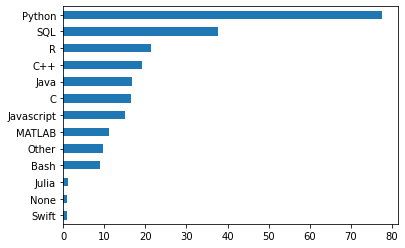

In [13]:
(language.sum().sort_values(ascending=True)/ language.shape[0] * 100).plot.barh()

#### What is the alternative to Python?
- Firstly, they is a minority of people who do not use Python on a regular basis.
- And people who don't use Python, use SQL and R for Data-related projects.
- Java is another alternative which is probably used because of its presence.

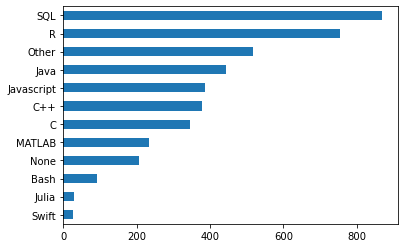

In [14]:
(language[language['Python'] == 0].groupby(['Python']).sum()).iloc[0].sort_values().plot.barh()

## Given that you know one language, what are the chances that you know multiple languages?
- Based on the data, poeple who use swift regularly know almost 4 programming languages.
- Julia Javascript, Java, and C/C++ follow after swift in the average number of programming languages developers use.
- Now thigns get interesting when it comes to Python, R, and SQL:
    - Python has the lowest average among the programming languages. This shows that lots of people who have learned Python had not seen the point in learning another programming languages.
    - Now between these three, SQL has the highest average, this is probably because of the fact that SQL is limited in the paradigm of things it can do (compared to OO languages R and Python). And people have seeked to learn another programming languages.
    - Same logic apples to R as well, since it is not a general purpose programming language, Kagglers have learned alternatives.
    - All these add up to say that Python is the most prefered choice for data-related projects based on the data sicne it has discouraged people from learning other technologies.

In [103]:
def average_lang_num(lang):
    return language[language[lang] == 1].sum(axis=1).mean()

for lang in language.columns:
    if lang == 'None' or lang == 'Other': continue # Other and None do not make sense
    print(f'Average # of languages if [{lang}] is {round(average_lang_num(lang) - 1,2)}')

Average # of languages if [Python] is 1.78
Average # of languages if [R] is 2.36
Average # of languages if [SQL] is 2.54
Average # of languages if [C] is 3.22
Average # of languages if [C++] is 3.04
Average # of languages if [Java] is 3.19
Average # of languages if [Javascript] is 3.23
Average # of languages if [Julia] is 3.4
Average # of languages if [Swift] is 3.77
Average # of languages if [Bash] is 3.2
Average # of languages if [MATLAB] is 2.89


# Q8: Recommended Programming Language for a beginner
- Could be interesting to see which language do each person (based on their role) recommend.

<AxesSubplot:>

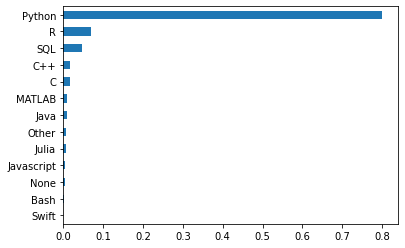

In [191]:
res['Q8'].value_counts(normalize=True).sort_values().plot.barh()

In [195]:
res[res['Q5'] == 'Research Scientist']['Q8']

12            R
65            R
68            R
84       Python
122      Python
          ...  
19992    Python
20011    Python
20020    Python
20023    Python
20034    Python
Name: Q8, Length: 1174, dtype: object

<AxesSubplot:title={'center':'3-5'}>

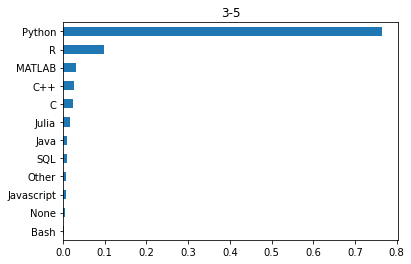

In [196]:
res[res['Q5'] == 'Research Scientist']['Q8'].value_counts(normalize=True).sort_values().plot.barh(title="Researchers")

# Q9: IDE
- Jupyter Products are widely used. It is important to note that this decision is affected by the popular programming languages. Also, Jupyter provides support for pretty much all the top used languages.
- The interesting thing to see is that Python IDE users are diverse, some use Jupyter, code, Pycharm, and Spyder.
- I postulate that people who use Vim/Emacs and Visual Studio are older than others.

In [12]:
# Renaming some of the columns for our own ease
ide.rename(columns={
        'Jupyter (JupyterLab, Jupyter Notebooks, etc) ': 'Jupyter',
        'Visual Studio Code (VSCode)': 'VSCode',
        '  Vim / Emacs  ': 'Vim/Emacs',
    }, inplace=True)

<AxesSubplot:>

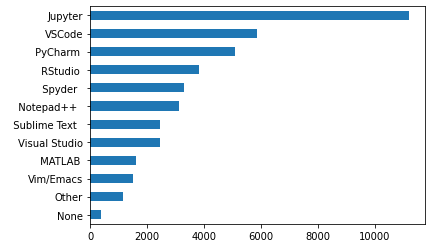

In [28]:
# Plotting the number of occurances
ide.sum().sort_values(ascending=True).plot.barh()

Interestingly, most poeple who use Vim/Emacs are between 25-29, yet my postulation is not necessarily wrong since most users are in their thirties. Also, the majority of surveyed people were in 22-24 age range and it is still 4th in the place.

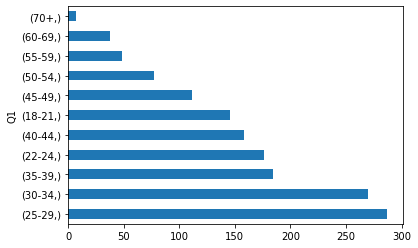

In [17]:
res.loc[ide[ide['  Vim / Emacs  '] == 1].index, ['Q1']].value_counts().plot.barh()

## What is the alternative IDE for MATLAB users?
- Octave, is a non-paid version of MATLAB and it is one of the possible ides used by Kagglers.
- Jupyter has support for it yet there are only ~650 MATLAB programmers who use other products than MATLAB IDE.

In [18]:
matlab_users= language[language['MATLAB'] == 1].shape[0]
ide_users = ide[ide[' MATLAB '] == 1].shape[0]
print(f'{matlab_users} claimed they use MATLAB (Language) regularly yet {ide_users} use MATLAB (Editor) as their editor!')

2217 claimed they use MATLAB regularly yet 1604 use MATLAB as their editor!


# Q10: Host Prod
- Majority use Google products (Colab and Kaggle Notebooks)
- Followd by `None`, Which implies that a good portion of the Kagglers do not use hosted services.


<AxesSubplot:>

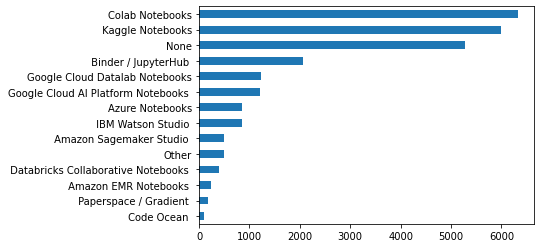

In [34]:
host_prod.sum().sort_values(ascending=True).plot.barh()

# Q11: Most Common setup
- 3007 people did not answer this question which is relatively odd. They probably were confused by the wording or didn't think they should choose the None or Orher option.
- Correlation between perfessional degree and Cloud usage?

In [22]:
# Shortening the option values, for ease of Plotting.
res['Q11'].replace(inplace=True,
    to_replace = {
        'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)': 'Cloud',
        'A personal computer or laptop': 'Local',
        'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)': 'DL Workstation',
    }
)

<AxesSubplot:>

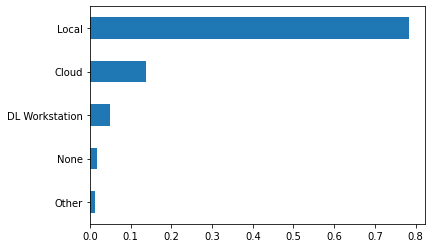

In [26]:
res['Q11'].value_counts(normalize=True).sort_values(ascending=True).plot.barh()

- Interestingly the majority of Kagglers use their own local environment:
    - This means that the Kaggle Notebooks might not be as comfortable as their local environment.
    


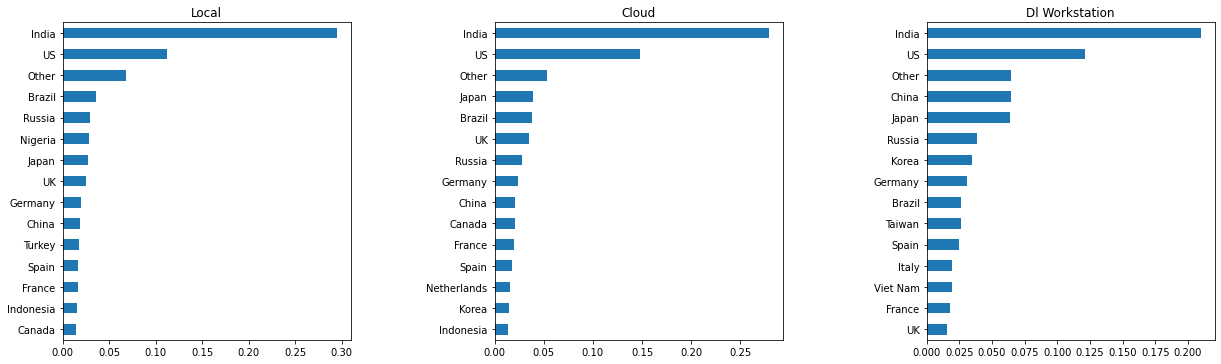

In [55]:
fig, r1 = plt.subplots(1, 3, figsize=(8,5))
fig.tight_layout()

res[res['Q11'] == 'Local']['Q3'].value_counts(normalize=True)[:15].sort_values(ascending=True).sort_values().plot.barh(title="Local",ax = r1[0])
res[res['Q11'] == 'Cloud']['Q3'].value_counts(normalize=True)[:15].sort_values(ascending=True).plot.barh(title="Cloud", ax=r1[1])
res[res['Q11'] == 'DL Workstation']['Q3'].value_counts(normalize=True)[:15].sort_values(ascending=True).plot.barh(title="Dl Workstation", ax=r1[2])

plt.subplots_adjust(left=0, bottom=None, right=2, top=None, wspace=.5, hspace=0.2)


In [31]:
res[res['Q4'] == 'Pro deg']['Q11'].value_counts()

Local             458
Cloud              68
DL Workstation     22
Other              14
None               10
Name: Q11, dtype: int64

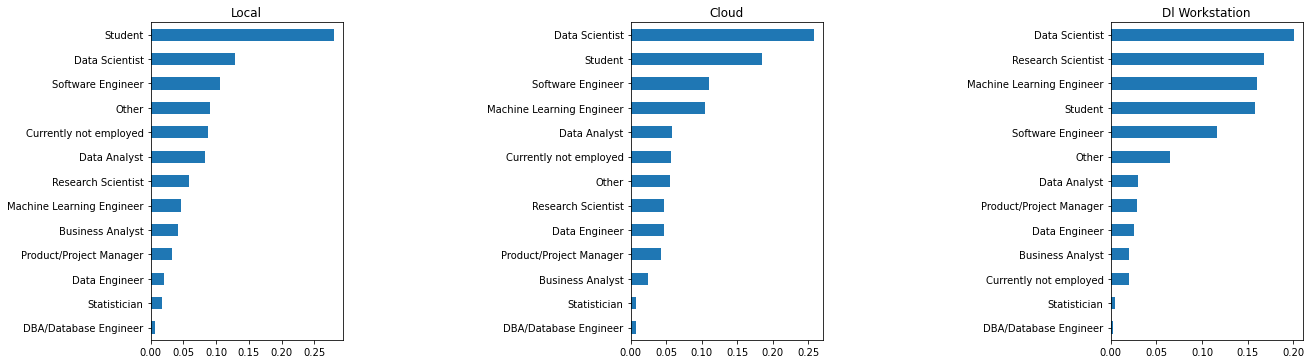

In [42]:
fig, r1 = plt.subplots(1, 3, figsize=(8,5))
fig.tight_layout()

res[res['Q11'] == 'Local']['Q5'].value_counts(normalize=True).sort_values().plot.barh(title="Local",ax = r1[0])
res[res['Q11'] == 'Cloud']['Q5'].value_counts(normalize=True).sort_values().plot.barh(title="Cloud", ax=r1[1])
res[res['Q11'] == 'DL Workstation']['Q5'].value_counts(normalize=True).sort_values().plot.barh(title="Dl Workstation", ax=r1[2])

plt.subplots_adjust(left=0, bottom=None, right=2, top=None, wspace=1.5, hspace=0.2)

- The majority of Kagglers are students and they use their local environment the most, so we can postualte that it is the students huge impact on the enormous number of Local users.
- Students have a fewer use of DL Workstations which implies that it is not justified for them to invest in such a equipment.

# Q13: TPU usage

- It would be safe to assume that anyone that has used a TPU more than 25 times, is a regual user.

<AxesSubplot:>

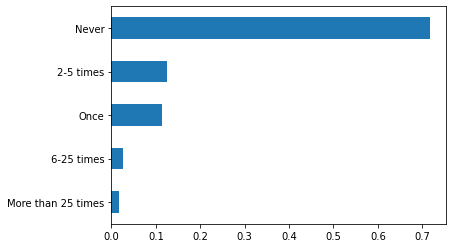

In [66]:
res['Q13'].value_counts(normalize=True).sort_values(ascending=True).plot.barh()

- 70% Majority has never use a TPU:
    - The algorithms they use or their problem is not difficult enough to need such a high power.
    - People who have not used are probably Data Analytics (kind job, less technical) or Data Scientist whom are focused on fields where TPUs are not required (not doing Deep Learning stuff).
    - We could aslo explore this majority with the choice of setup since most Kagglers use Local Environmnets, they haven't seen it feasible to buy a TPU.
    - Given the graph is is hard to make any assumption since there are lots of students in the data. But obviously students who have a lower understanding of various concepts (compared to other roles), use the least amount of TPU. This also implies they are participating in a fields where TPU might not be required (they are not doing anything Deep learning-related). Which again implies a lower level understangin.

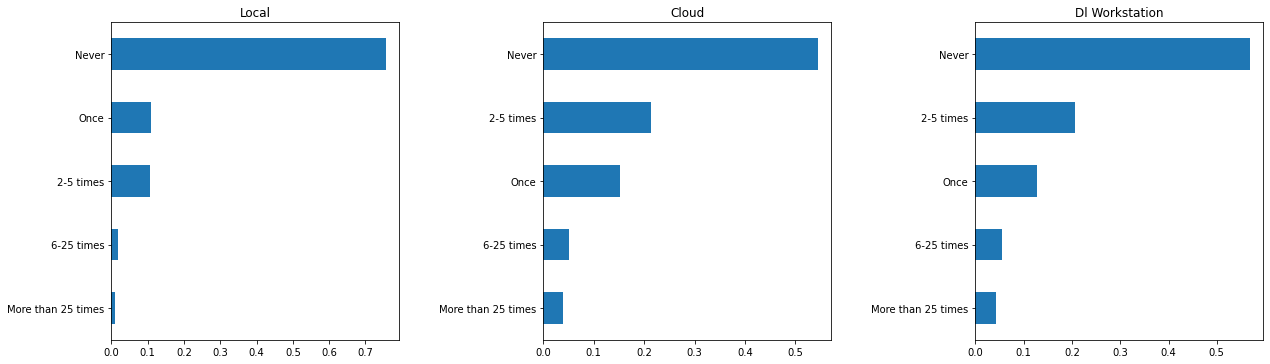

In [72]:
fig, r1 = plt.subplots(1, 3, figsize=(8,5))
fig.tight_layout()

res[res['Q11'] == 'Local']['Q13'].value_counts(normalize=True).sort_values().plot.barh(title="Local",ax = r1[0])
res[res['Q11'] == 'Cloud']['Q13'].value_counts(normalize=True).sort_values().plot.barh(title="Cloud", ax=r1[1])
res[res['Q11'] == 'DL Workstation']['Q13'].value_counts(normalize=True).sort_values().plot.barh(title="Dl Workstation", ax=r1[2])

plt.subplots_adjust(left=0, bottom=None, right=2, top=None, wspace=.5, hspace=0.2)

There are more TPU users among Cloud and Workstation users, yet they majority in each of these setp users are `Never`. Workstation users probably don't need to use TPUs to icnrease their speed and the cloud users are probably satisfied by using GPUs (for speed-related reasons).

# Q14: Visualaztion tools
- There is correlation between the visualization tools and the programming languages. Since Python is the most commonly used programming language, there is not surprise when mapltlib and seaborn.

<AxesSubplot:>

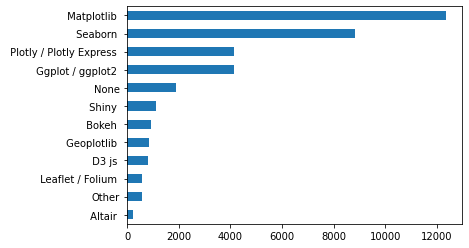

In [16]:
viz_lib.sum().sort_values(ascending=True).plot.barh()

# Q15: ML Algorithm years

<AxesSubplot:>

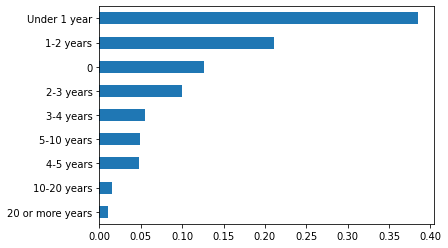

In [81]:
res['Q15'].replace({'I do not use machine learning methods': '0'}, inplace=True)
res['Q15'].value_counts(normalize=True).sort_values().plot.barh()

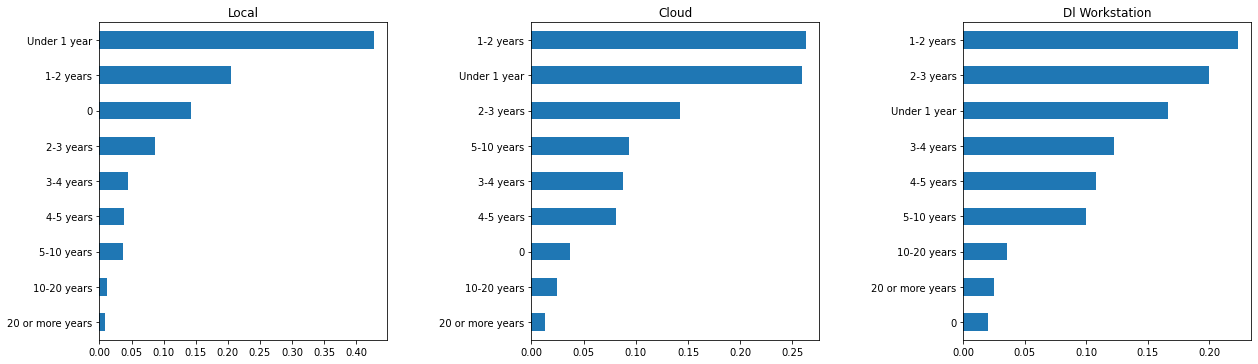

In [82]:
fig, r1 = plt.subplots(1, 3, figsize=(8,5))
fig.tight_layout()

res[res['Q11'] == 'Local']['Q15'].value_counts(normalize=True).sort_values().plot.barh(title="Local",ax = r1[0])
res[res['Q11'] == 'Cloud']['Q15'].value_counts(normalize=True).sort_values().plot.barh(title="Cloud", ax=r1[1])
res[res['Q11'] == 'DL Workstation']['Q15'].value_counts(normalize=True).sort_values().plot.barh(title="Dl Workstation", ax=r1[2])

plt.subplots_adjust(left=0, bottom=None, right=2, top=None, wspace=.5, hspace=0.2)

# Q16: Regularly used ML libraries

<AxesSubplot:>

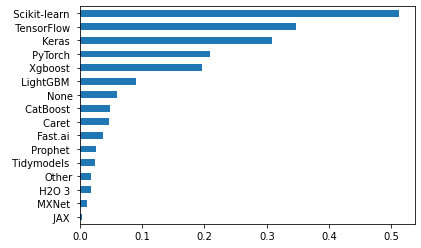

In [21]:
(ml_lib.sum() / ml_lib.shape[0]).sort_values(ascending=True).plot.barh()

# Q17: Algorithms

<AxesSubplot:>

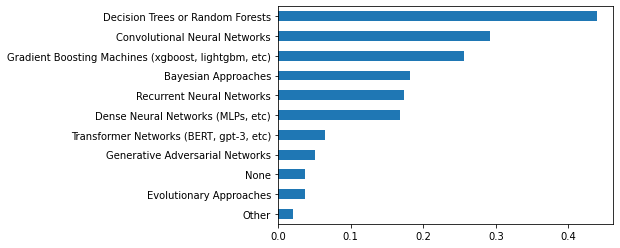

In [22]:
(algo.sum() / algo.shape[0]).sort_values(ascending=True).plot.barh()

# Q18: Computer Vision

<AxesSubplot:>

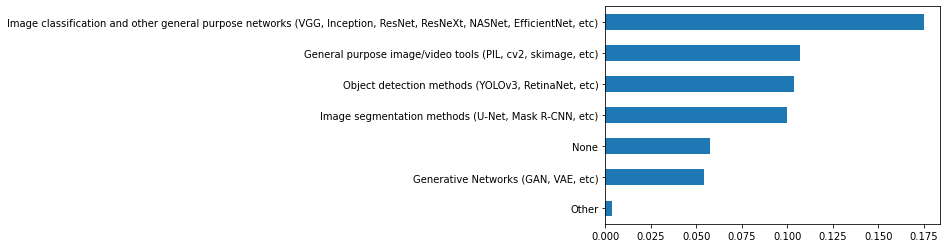

In [24]:
(comp_vision.sum() / comp_vision.shape[0]).sort_values(ascending=True).plot.barh()

# Q19: NLP algorithms

<AxesSubplot:>

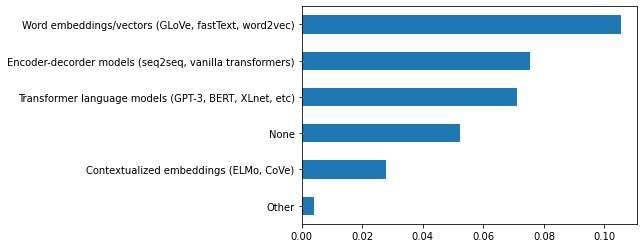

In [25]:
(nlp.sum() / nlp.shape[0]).sort_values(ascending=True).plot.barh()

# Q20: # of employees in the company

<AxesSubplot:>

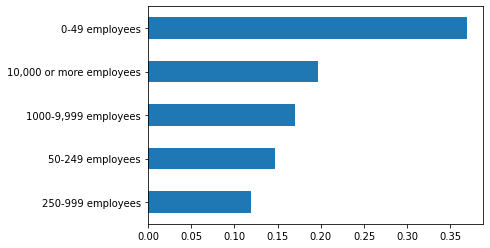

In [31]:
res['Q20'].value_counts(normalize=True).sort_values(ascending=True).plot.barh()

# Q21: # of Data Scientist in company

<AxesSubplot:>

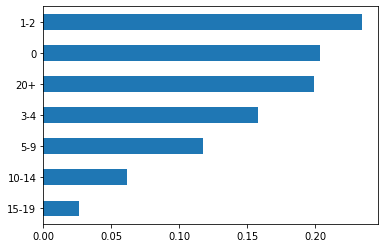

In [32]:
res['Q21'].value_counts(normalize=True).sort_values(ascending=True).plot.barh()

# Q22: Does your workplace use ML?

<AxesSubplot:>

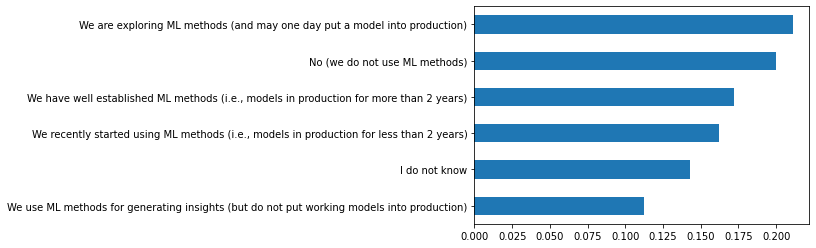

In [33]:
res['Q22'].value_counts(normalize=True).sort_values(ascending=True).plot.barh()

<AxesSubplot:>

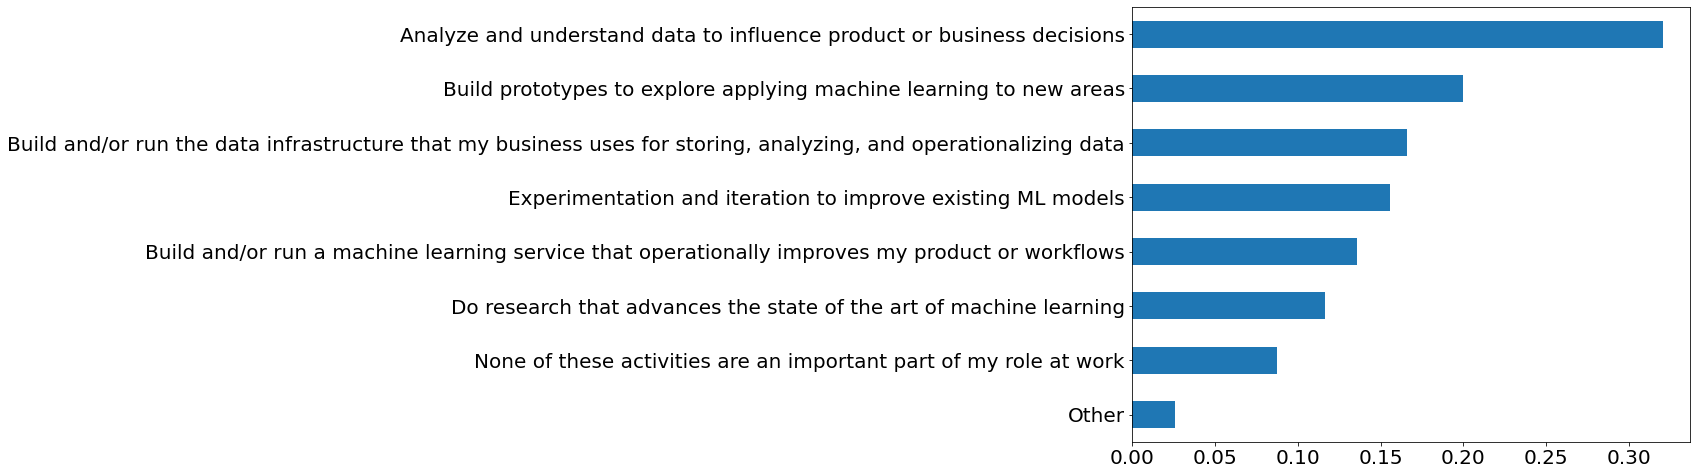

In [46]:
(work_activity.sum() / work_activity.shape[0]).sort_values(ascending=True).plot.barh(figsize=(10, 8), fontsize=20)

# Q24: Salary

<AxesSubplot:>

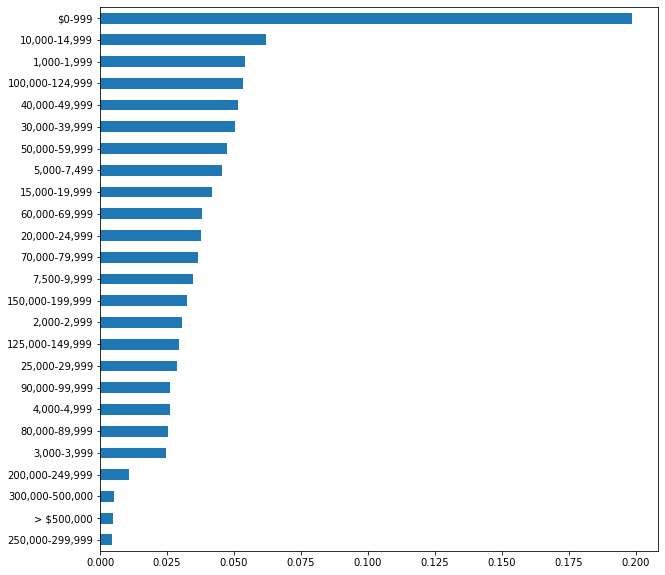

In [37]:
res['Q24'].value_counts(normalize=True).sort_values(ascending=True).plot.barh(figsize=(10,10))

# Q25: ML Expenses

<AxesSubplot:>

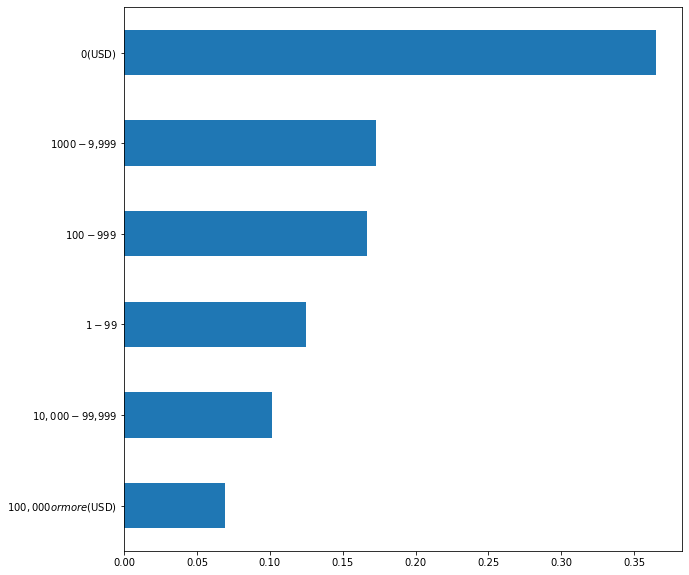

In [48]:
res['Q25'].value_counts(normalize=True).sort_values(ascending=True).plot.barh(figsize=(10,10))

# Q26: Cloud platform

<AxesSubplot:>

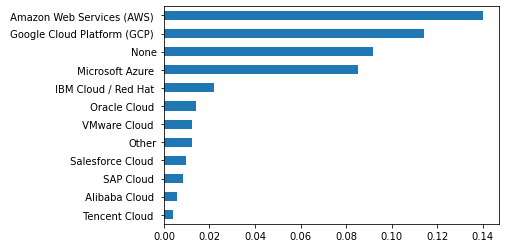

In [49]:
(cloud_platform.sum() / cloud_platform.shape[0]).sort_values(ascending=True).plot.barh()

# Q30: Frequently used big data tool
- Too many missing values

In [52]:
res['Q30'].unique()

array([nan, 'PostgresSQL ', 'MySQL ',
       'Microsoft Azure Data Lake Storage ', 'Amazon Redshift ',
       'Microsoft SQL Server ', 'Google Cloud Firestore ',
       'Amazon DynamoDB ', 'MongoDB ', 'Microsoft Access ',
       'Oracle Database ', 'Google Cloud BigQuery ', 'SQLite ',
       'Snowflake ', 'IBM Db2 ', 'Other', 'Amazon Athena ',
       'Google Cloud SQL '], dtype=object)

# Q32: Most Frequently used BI tools

In [53]:
res['Q32'].isnull().sum()

18538

# Q38: Primary tools used for Data Analysis

<AxesSubplot:>

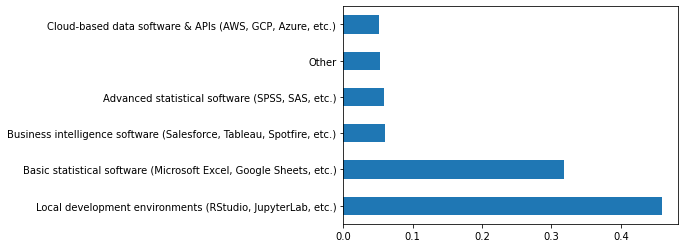

In [58]:
res['Q38'].value_counts(normalize=True).plot.barh()

In [56]:
res['Q38'].isnull().sum()

6746